# Graph Analysis of CSD
### This notebook tests graph theoretic analysis on skeletons produced from persistence analysis on CSD profiles using the topology toolkit

#### Load the data

In [2]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
sns.set()

if  not 'C:\\Program Files (x86)\\Graphviz2.38\\bin' in os.environ["PATH"]: 
    os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

In [2]:
# csd_skeleton = np.genfromtxt('D:/Jones Lab/csd_real_skeleton.csv', delimiter = ',', skip_header=1)

csd_surface_df = pd.read_csv('D:/Jones_Lab/hnn_params/input_time_sweep/input_time_data/test_sweep-t_evprox_1_0_t_evdist_1_0.csv', sep=',')
csd_nodes_df = pd.read_csv('D:/Jones_Lab/hnn_params/input_time_sweep/input_time_skeleton/test_sweep-t_evprox_1_0_t_evdist_1_0_nodes.csv', sep=',')
csd_connectivity_df = pd.read_csv('D:/Jones_Lab/hnn_params/input_time_sweep/input_time_skeleton/test_sweep-t_evprox_1_0_t_evdist_1_0_arcs.csv', sep=',')
csd_connectivity_dense_df = pd.read_csv('D:/Jones_Lab/hnn_params/input_time_sweep/input_time_skeleton/test_sweep-t_evprox_1_0_t_evdist_1_0_arcs.csv', sep=',')


# surface_points = np.array(csd_surface_df[['Points:0','Points:1','Points:2']]) #Use if extracting points from paraview
surface_points = np.array(csd_surface_df) #Use if using original surface file

node_points = np.array(csd_nodes_df[['Points:0','Points:1','Points:2']])
node_connectivity = np.array(csd_connectivity_df[['upNodeId','downNodeId']])
node_connectivity_dense = np.array(csd_connectivity_dense_df[['upNodeId','downNodeId']])


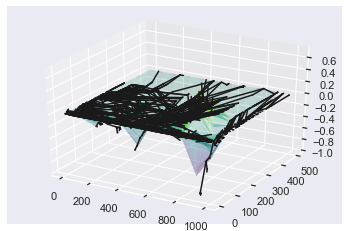

In [3]:
%matplotlib inline

num_pairs = node_connectivity.shape[0]
fig = plt.figure()
ax = plt.axes(projection='3d')

for pair in range(num_pairs):
    pairID = node_connectivity[pair]
    pairID
    xdata, ydata, zdata = node_points[pairID, 0], node_points[pairID, 1], node_points[pairID, 2]

    ax.plot(xdata,ydata,zdata, 'k')

ax.plot_trisurf(surface_points[::100,0],surface_points[::100,1],surface_points[::100,2],cmap='viridis',edgecolor='none', alpha=0.2)

plt.show()


### Load Nodes into graph

In [5]:
# G = nx.Graph()
# G.add_edges_from(node_connectivity)

A = nx.Graph()
A.add_edges_from(node_connectivity_dense)
# pos = graphviz_layout(A, prog='neato')

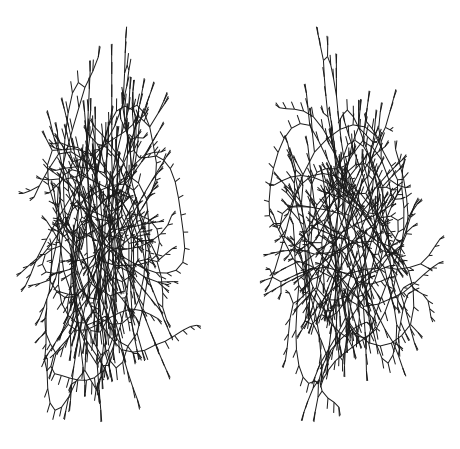

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(121)
# nx.draw(A,pos,node_size=0)
nx.draw(A,node_size=0)


plt.subplot(122)
# nx.draw(A,pos,node_size=0)
nx.draw(A,node_size=0)



Load group of skeletons into dictionary

In [10]:
file_prefix = 'input_strength032320'
skeleton_dir = 'D:/Jones_Lab/hnn_params/' + file_prefix + '/' +  file_prefix + '_skeleton'

# Remove suffix info, extract names
file_names = [f for f in listdir(skeleton_dir) if isfile(join(skeleton_dir, f))]
file_names = [f_new.replace('_arcs.csv','') for f_new in file_names]
file_names = [f_new.replace('_nodes.csv','') for f_new in file_names]
file_names = np.unique(file_names)


In [47]:
skeleton_dict = {}

for f in file_names:
    skeleton_dict[f] = {}

    df_path = skeleton_dir = 'D:/Jones_Lab/hnn_params/' + file_prefix + '/' +  file_prefix + '_skeleton/' + f + '_arcs.csv'
    connectivity_df = pd.read_csv(df_path, sep = ',')
    connectivity_map = np.array(connectivity_df[['upNodeId','downNodeId']])

    G = nx.Graph()
    G.add_edges_from(connectivity_map)

    skeleton_dict[f]['Network_obj'] = G
    skeleton_dict[f]['Diameter'] = nx.diameter(G) #Maximum eccentricity
    skeleton_dict[f]['Radius'] = nx.radius(G) #Minimum eccentricity
    skeleton_dict[f]['Num_nodes'] = nx.number_of_nodes(G)
    skeleton_dict[f]['Num_edges'] = nx.number_of_edges(G)
    # skeleton_dict[f]['Global_Efficiency'] = nx.global_efficiency(G)

    G.clear()

    print(f + '...done')


input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_0...done
input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_1...done
input_strength032320_sweep-numspikes_evprox_1_0_numspikes_evdist_1_2...done
input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_0...done
input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_1...done
input_strength032320_sweep-numspikes_evprox_1_1_numspikes_evdist_1_2...done
input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_0...done
input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_1...done
input_strength032320_sweep-numspikes_evprox_1_2_numspikes_evdist_1_2...done


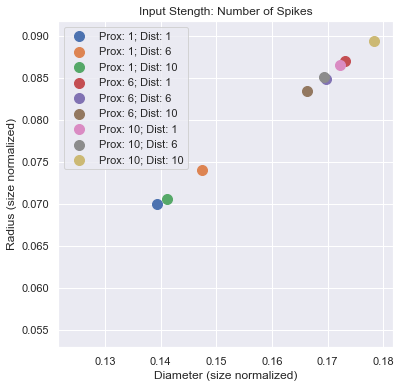

In [58]:
#Param values
param_names = ['Prox: ','; Dist: ']
param_val = [np.rint(np.linspace(1,10,3)).astype(int), np.rint(np.linspace(1,10,3)).astype(int)]
param_sets = [ [[s1,s2], [v1,v2]]  for s1,v1 in enumerate(param_val[0]) for s2,v2 in enumerate(param_val[1])]

legend_string = []
plt.figure(figsize=(6,6))
for idx,f in enumerate(file_names):
    # plt.subplot(3,3,idx+1)
    # vals = [skeleton_dict[f]['Diameter'], skeleton_dict[f]['Radius']]
    # vals = [skeleton_dict[f]['Diameter']]
    # plt.bar(np.arange(len(vals)),vals)

    f_label = param_names[0] + str(param_sets[idx][1][0]) + param_names[1] + str(param_sets[idx][1][1])
    legend_string.append(f_label)

    norm_list = [1, skeleton_dict[f]['Num_nodes'], skeleton_dict[f]['Num_edges']]
    norm_factor = norm_list[1]

    xval, yval = skeleton_dict[f]['Diameter'], skeleton_dict[f]['Radius']
    
    plt.scatter(xval/norm_factor, yval/norm_factor, s=100)

plt.legend(legend_string)
plt.xlabel('Diameter (size normalized)')
plt.ylabel('Radius (size normalized)')
plt.title('Input Stength: Number of Spikes')
plt.show()
